<a href="https://colab.research.google.com/github/NBK-code/Time_Series_Data/blob/main/Using_XGBoost_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

##Load Data

In [16]:
df = pd.read_csv('/content/PJME_hourly.csv')

In [17]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [18]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


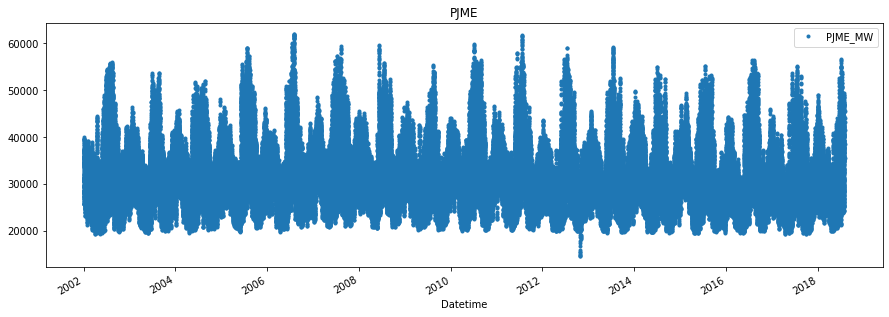

In [21]:
df.plot(style = '.', figsize = (15,5), title = 'PJME')
plt.show()

## Train Test Split

In [20]:
train = df.loc[ df.index < '01-01-2015' ]
test = df.loc[ df.index >= '01-01-2015' ]

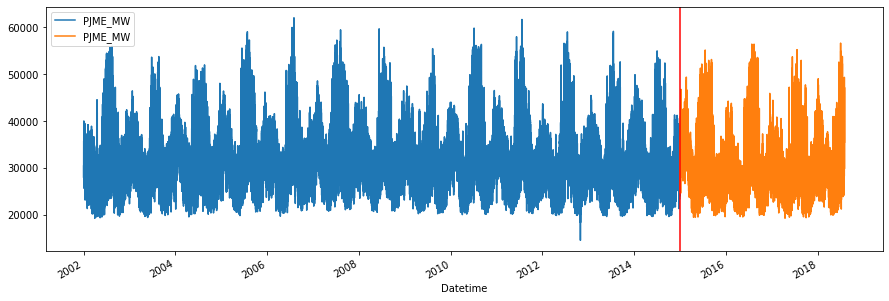

In [27]:
fig, ax = plt.subplots(figsize = (15, 5))
train.plot(ax = ax, label  = "Train Data")
test.plot(ax = ax, label = "Test Data")
ax.axvline('01-01-2015', color = 'red')
plt.show()

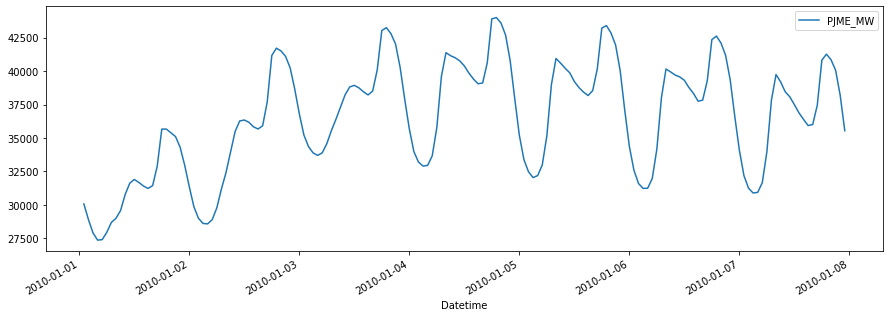

In [36]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize = (15,5))

##Feature Creation

In [41]:
def create_features(df):

  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear

  return df 

In [43]:
df = create_features(df)

In [44]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


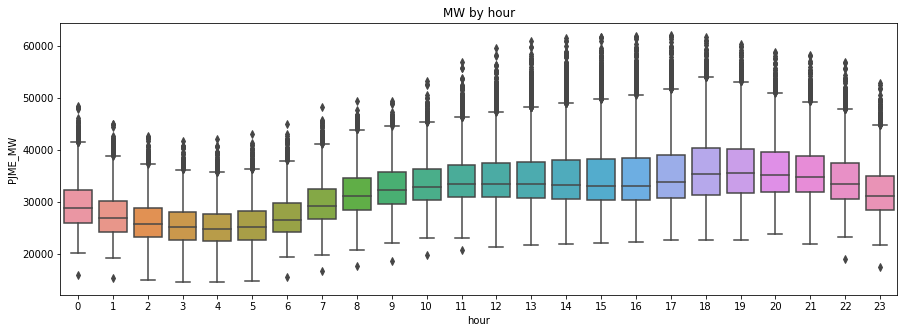

In [46]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(data = df, x = 'hour', y = 'PJME_MW')
ax.set_title('MW by hour')
plt.show()

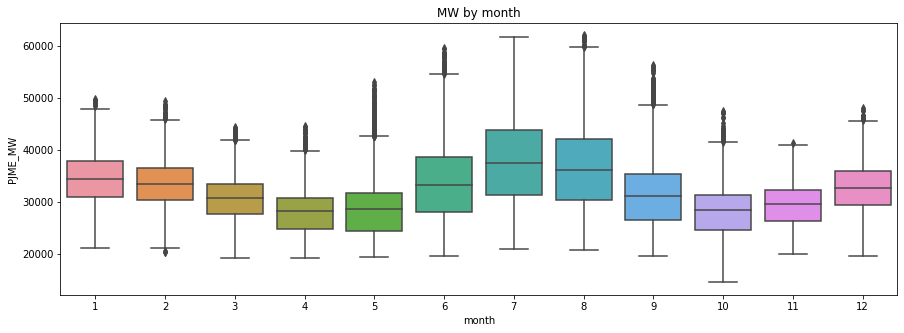

In [48]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(data = df, x = 'month', y = 'PJME_MW')
ax.set_title('MW by month')
plt.show()

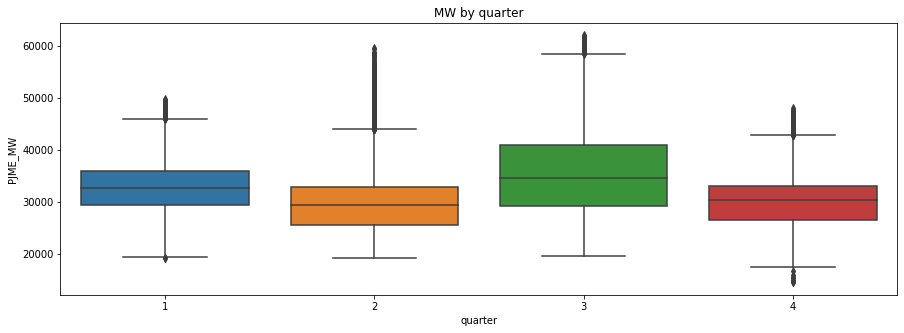

In [50]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(data = df, x = 'quarter', y = 'PJME_MW')
ax.set_title('MW by quarter')
plt.show()

##Model Creation

In [ ]:
train = create_features(train)
test = create_features(test)

In [53]:
train.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


In [54]:
test.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365


In [57]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = ["PJME_MW"]

In [59]:
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [64]:
model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds = 50, learning_rate = 0.01)

In [65]:
model.fit(X = X_train, y = y_train,
          eval_set = [(X_train, y_train), (X_test, y_test)],
          verbose = 100)

[04:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32605.1	validation_1-rmse:31657.1
[100]	validation_0-rmse:12581.2	validation_1-rmse:11743.7
[200]	validation_0-rmse:5835.05	validation_1-rmse:5365.67
[300]	validation_0-rmse:3915.7	validation_1-rmse:4020.66
[400]	validation_0-rmse:3443.11	validation_1-rmse:3853.4
[500]	validation_0-rmse:3285.31	validation_1-rmse:3805.31
[600]	validation_0-rmse:3201.91	validation_1-rmse:3772.44
[700]	validation_0-rmse:3148.12	validation_1-rmse:3750.92
[800]	validation_0-rmse:3109.22	validation_1-rmse:3733.9
[900]	validation_0-rmse:3079.37	validation_1-rmse:3725.61
[999]	validation_0-rmse:3052.71	validation_1-rmse:3722.92


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

##Feature Importance

In [66]:
model.feature_importances_

array([0.31852585, 0.17292202, 0.06649725, 0.28595704, 0.02599413,
       0.13010369], dtype=float32)

In [68]:
fi = pd.DataFrame(data = model.feature_importances_,
                  index = FEATURES,
                  columns = ['Importance'])

In [69]:
fi

,Importance
hour,0.318526
dayofweek,0.172922
quarter,0.066497
month,0.285957
year,0.025994
dayofyear,0.130104


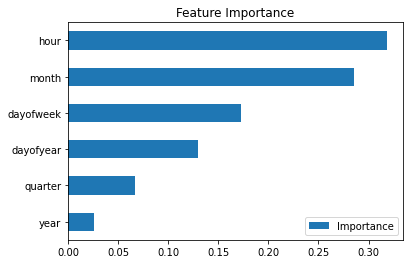

In [70]:
fi.sort_values('Importance').plot(kind = 'barh', title = "Feature Importance")

##Forecast on Test Data

In [ ]:
test['predictions'] = model.predict(X_test)

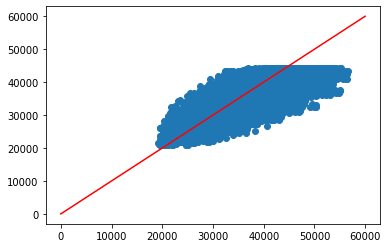

In [84]:
x_data = [0, 60000]
plt.scatter(test['PJME_MW'], test['predictions'])
plt.plot(x_data, x_data, color = 'red', label = 'x=y')

In [78]:
df = df.merge(test['predictions'], how = 'left', left_index = True, right_index = True)

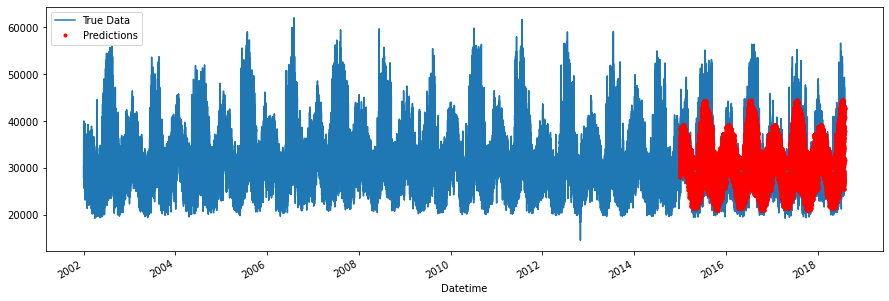

In [80]:
ax = df['PJME_MW'].plot(figsize = (15,5))
df['predictions'].plot(ax = ax, style = '.', color = 'red')
plt.legend(['True Data', 'Predictions'])
plt.show()

In [81]:
mse = mean_squared_error(test['PJME_MW'], test['predictions'])
mse

13860151.377087135

In [83]:
rmse = np.sqrt(mse)
rmse

3722.922424263919